In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))
print(sys.version)

2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]


In [3]:
train_data_dir = r"D:\CNNtest\WorkingData\10_food_classes_all_data\train"
test_data_dir = r"D:\CNNtest\WorkingData\10_food_classes_all_data\test"

# ROUGH WORK FOR LOADING MULTICLASS IMAGES INTO DATASETS

In [4]:
train_data_ds,valid_data_ds = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                             label_mode="categorical",
                                                             validation_split=0.2,
                                                             subset="both",
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(224,224),
                                                             batch_size=32)

test_data_ds = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                           label_mode="categorical",
                                                           shuffle=True,
                                                           seed=42,
                                                           image_size=(224,224),
                                                           batch_size=32)

Found 7500 files belonging to 10 classes.
Using 6000 files for training.
Using 1500 files for validation.
Found 2500 files belonging to 10 classes.


In [5]:
train_data_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
images,labels = next(iter(train_data_ds))

In [7]:
tf.argmax(labels[0]).numpy()

4

In [8]:
train_data_ds.features.ClassLabel

AttributeError: 'BatchDataset' object has no attribute 'features'

In [10]:
import pathlib
import os

fg = os.walk(train_data_dir)

In [11]:
fg1,fg2,fg3 = fg

ValueError: too many values to unpack (expected 3)

In [12]:
for filename,fg2,fg3 in os.walk(train_data_dir):
    print(filename)

D:\CNNtest\WorkingData\10_food_classes_all_data\train
D:\CNNtest\WorkingData\10_food_classes_all_data\train\chicken_curry
D:\CNNtest\WorkingData\10_food_classes_all_data\train\chicken_wings
D:\CNNtest\WorkingData\10_food_classes_all_data\train\fried_rice
D:\CNNtest\WorkingData\10_food_classes_all_data\train\grilled_salmon
D:\CNNtest\WorkingData\10_food_classes_all_data\train\hamburger
D:\CNNtest\WorkingData\10_food_classes_all_data\train\ice_cream
D:\CNNtest\WorkingData\10_food_classes_all_data\train\pizza
D:\CNNtest\WorkingData\10_food_classes_all_data\train\ramen
D:\CNNtest\WorkingData\10_food_classes_all_data\train\steak
D:\CNNtest\WorkingData\10_food_classes_all_data\train\sushi


In [13]:
import pathlib 

path = pathlib.Path(train_data_dir)

fg = path.glob("*")

In [14]:
fg

<generator object Path.glob at 0x0000018A5BD41EE0>

In [15]:
for x in fg:
    print(x)

D:\CNNtest\WorkingData\10_food_classes_all_data\train\chicken_curry
D:\CNNtest\WorkingData\10_food_classes_all_data\train\chicken_wings
D:\CNNtest\WorkingData\10_food_classes_all_data\train\fried_rice
D:\CNNtest\WorkingData\10_food_classes_all_data\train\grilled_salmon
D:\CNNtest\WorkingData\10_food_classes_all_data\train\hamburger
D:\CNNtest\WorkingData\10_food_classes_all_data\train\ice_cream
D:\CNNtest\WorkingData\10_food_classes_all_data\train\pizza
D:\CNNtest\WorkingData\10_food_classes_all_data\train\ramen
D:\CNNtest\WorkingData\10_food_classes_all_data\train\steak
D:\CNNtest\WorkingData\10_food_classes_all_data\train\sushi


In [16]:
for filenames,fg1,fg2 in os.walk(train_data_dir):
    print(filenames)

D:\CNNtest\WorkingData\10_food_classes_all_data\train
D:\CNNtest\WorkingData\10_food_classes_all_data\train\chicken_curry
D:\CNNtest\WorkingData\10_food_classes_all_data\train\chicken_wings
D:\CNNtest\WorkingData\10_food_classes_all_data\train\fried_rice
D:\CNNtest\WorkingData\10_food_classes_all_data\train\grilled_salmon
D:\CNNtest\WorkingData\10_food_classes_all_data\train\hamburger
D:\CNNtest\WorkingData\10_food_classes_all_data\train\ice_cream
D:\CNNtest\WorkingData\10_food_classes_all_data\train\pizza
D:\CNNtest\WorkingData\10_food_classes_all_data\train\ramen
D:\CNNtest\WorkingData\10_food_classes_all_data\train\steak
D:\CNNtest\WorkingData\10_food_classes_all_data\train\sushi


In [17]:
class_names = np.array(sorted([item.name for item in path.glob("*")]))

In [18]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [19]:
def show_image(image,label):
    image = image/255.0
    fglabel = tf.argmax(label).numpy()
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.title(class_names[fglabel])
    plt.show()

In [20]:
images,labels = next(iter(train_data_ds))

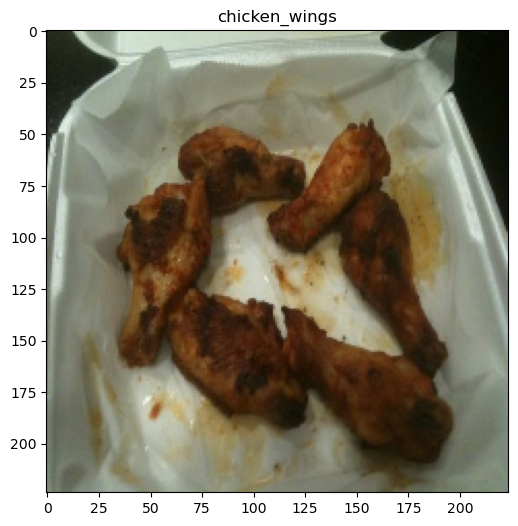

In [21]:
import random

ran = random.randint(0,31)

show_image(images[ran],labels[ran])

In [22]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [23]:
class_labels = ["ice_cream","pizza","sushi","fried_rice","chicken_curry","steak","grilled_salmon","ramen","hamburger","chicken_wings"]

In [24]:
len(class_labels)

10

In [25]:
train_ds_new , valid_ds_new  = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                                           labels="inferred",
                                                                           label_mode="categorical",
                                                                           validation_split=0.2,
                                                                           subset="both",
                                                                           seed=42,
                                                                           class_names=class_labels,
                                                                           shuffle=True,
                                                                           image_size=(224,224),
                                                                           batch_size=32)

Found 7500 files belonging to 10 classes.
Using 6000 files for training.
Using 1500 files for validation.


In [26]:
def show_image(image,label):
    image = image/255.0
    fglabel = tf.argmax(label).numpy()
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.title(class_labels[fglabel])
    plt.show()

In [27]:
images,labels = next(iter(train_ds_new))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


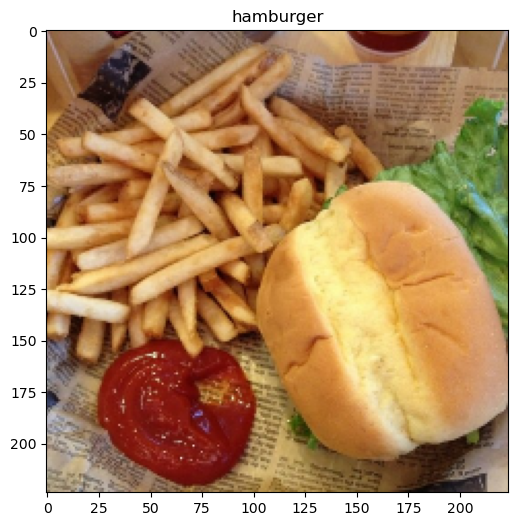

In [28]:
import random 

ran = random.randint(0,31)

print(labels[ran])
show_image(images[ran],labels[ran])

In [29]:
class_labels = ["ice_cream","sushi","fried_rice","chicken_curry","steak","grilled_salmon","ramen","hamburger","chicken_wings"]

In [30]:
len(class_labels)

9

In [31]:
train_ds_new , valid_ds_new  = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                                           labels="inferred",
                                                                           label_mode="categorical",
                                                                           validation_split=0.2,
                                                                           subset="both",
                                                                           seed=42,
                                                                           class_names=class_labels,
                                                                           shuffle=True,
                                                                           image_size=(224,224),
                                                                           batch_size=32)

ValueError: The `class_names` passed did not match the names of the subdirectories of the target directory. Expected: ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'], but received: ['ice_cream', 'sushi', 'fried_rice', 'chicken_curry', 'steak', 'grilled_salmon', 'ramen', 'hamburger', 'chicken_wings']

# DOING WITHOUT DATA AUGMENTATION

In [124]:
class_labels = ["ice_cream","pizza","sushi","fried_rice","chicken_curry","steak","grilled_salmon","ramen","hamburger","chicken_wings"]

In [125]:
len(class_labels)

10

In [126]:
train_ds_mn ,valid_ds_mn = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                                       labels="inferred",
                                                                       label_mode="categorical",
                                                                       class_names=class_labels,
                                                                       shuffle=True,
                                                                       validation_split=0.2,
                                                                       seed=42,
                                                                       subset="both",
                                                                       image_size=(224,224),
                                                                       batch_size=32)

test_ds_mn = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         labels="inferred",
                                                         label_mode="categorical",
                                                         class_names=class_labels,
                                                         shuffle=True,
                                                         image_size=(224,224),
                                                         batch_size=32)

Found 7500 files belonging to 10 classes.
Using 6000 files for training.
Using 1500 files for validation.
Found 2500 files belonging to 10 classes.


## Creating a Function to check whether Images and Labels match

In [127]:
def show_image(image,label):
    image = image/255.0
    fglabel = tf.argmax(label).numpy()
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.title(class_labels[fglabel])
    plt.show()

### Extracting images,labels randomly form Batches of the DATASET

In [128]:
images,labels = next(iter(test_ds_mn))

In [129]:
labels

<tf.Tensor: shape=(32, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0.,

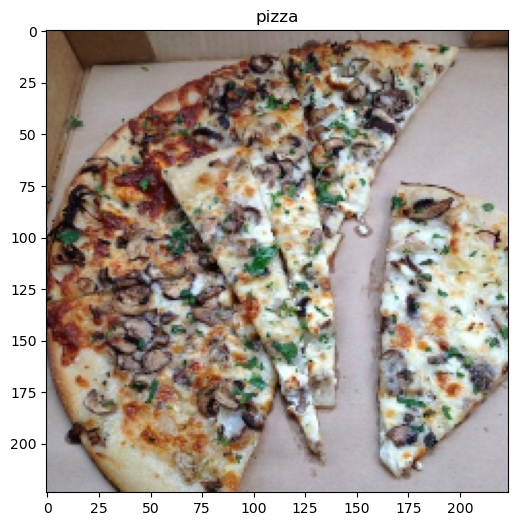

In [78]:
import random 

ran = random.randint(0,31)

show_image(images[ran],labels[ran])

## Creating The Model and Fitting it 

In [157]:
model1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Rescaling(1.0/255.0),
                                     tf.keras.layers.Conv2D(20,3,input_shape=(224,224,3),activation="relu"),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Conv2D(10,3,activation="relu"),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(10,activation="softmax")
])

model1.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
hist1 = model1.fit(train_ds_mn,
                   epochs=10,
                   steps_per_epoch=len(train_ds_mn),
                   validation_data=valid_ds_mn,
                   validation_steps=len(valid_ds_mn))

## CREATING FUNCTION FOR PLOTTING LOSS AND ACCURACY CURVE

In [ ]:
hist1.history

In [163]:
def plot_loss_accuracy(history):
    
    plt.figure(figsize=(6,6))
    plt.plot(history.history["loss"],label="Training Loss")
    plt.plot(history.history["val_loss"],label="Validation Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(history.history["accuracy"],label="Training Accuracy")
    plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
    plt.legend()
    plt.show()

In [ ]:
plot_loss_accuracy(hist1)

## Trying With DATA AUGMENTATION

In [135]:
augmen_model = tf.keras.models.Sequential([
                                            tf.keras.layers.RandomRotation(factor=0.12),
                                            tf.keras.layers.RandomHeight(factor=0.12),
                                            tf.keras.layers.RandomWidth(factor=0.12),
                                            tf.keras.layers.RandomZoom(height_factor=0.1,width_factor=0.1),
                                            tf.keras.layers.Resizing(height=224,width=224)                                         
])

In [136]:
train_ds_fg = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                          labels="inferred",
                                                          label_mode="categorical",
                                                          class_names=class_labels,
                                                          validation_split=0.2,
                                                          seed=42,
                                                          subset="training",
                                                          shuffle=True,
                                                          image_size=(224,224),
                                                          batch_size=None)

valid_ds_mn = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         labels="inferred",
                                                         label_mode="categorical",
                                                         class_names=class_labels,
                                                         validation_split=0.2,
                                                         seed=42,
                                                         subset="validation",
                                                         shuffle=True,
                                                         image_size=(224,224),
                                                         batch_size=32)

Found 7500 files belonging to 10 classes.
Using 6000 files for training.
Found 7500 files belonging to 10 classes.
Using 1500 files for validation.


In [137]:
images,labels = next(iter(train_ds_fg))

In [138]:
labels

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [139]:
train_ds_augmen = train_ds_fg.map(map_func= lambda x,y:(augmen_model(x),y),
                                  num_parallel_calls=tf.data.AUTOTUNE)

In [140]:
train_ds_augmen

<ParallelMapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.float32, name=None))>

In [142]:
train_ds_augmen = train_ds_augmen.batch(32)

## Checking if the AUGMENTated Image are properly labbeled

In [153]:
images,labels = next(iter(train_ds_augmen))

In [144]:
def show_image(image,label):
    image = image/255.0
    fglabel = tf.argmax(label).numpy()
    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.title(class_labels[fglabel])
    plt.show()

In [66]:
labels[0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

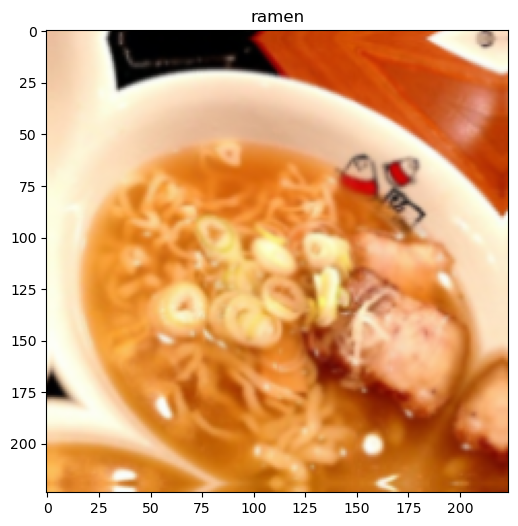

In [155]:
import random

ran = random.randint(0,31)
show_image(images[ran],labels[ran])

In [158]:
model2 = tf.keras.models.clone_model(model1)

In [160]:
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [162]:
hist2 =model2.fit(train_ds_augmen,
           epochs=10,
           steps_per_epoch=len(train_ds_augmen),
           validation_data=valid_ds_mn,
           validation_steps=len(valid_ds_mn))

Epoch 1/10
188/188 [==============================] - 90s 478ms/step - loss: 2.0220 - accuracy: 0.2788 - val_loss: 2.0675 - val_accuracy: 0.2407
Epoch 2/10
188/188 [==============================] - 88s 469ms/step - loss: 1.9424 - accuracy: 0.3222 - val_loss: 1.9906 - val_accuracy: 0.3033
Epoch 3/10
188/188 [==============================] - 89s 469ms/step - loss: 1.8900 - accuracy: 0.3453 - val_loss: 1.9744 - val_accuracy: 0.3287
Epoch 4/10
188/188 [==============================] - 86s 456ms/step - loss: 1.8504 - accuracy: 0.3575 - val_loss: 1.9441 - val_accuracy: 0.3360
Epoch 5/10
188/188 [==============================] - 85s 451ms/step - loss: 1.8207 - accuracy: 0.3755 - val_loss: 2.0027 - val_accuracy: 0.3227
Epoch 6/10
188/188 [==============================] - 85s 451ms/step - loss: 1.7902 - accuracy: 0.3773 - val_loss: 1.9043 - val_accuracy: 0.3427
Epoch 7/10
188/188 [==============================] - 86s 455ms/step - loss: 1.7842 - accuracy: 0.3862 - val_loss: 1.9297 - val_ac

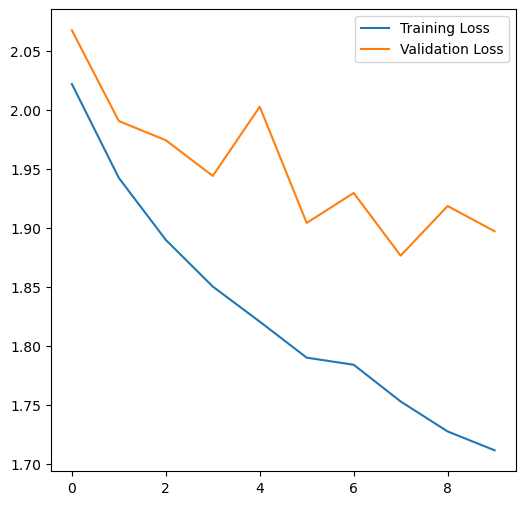

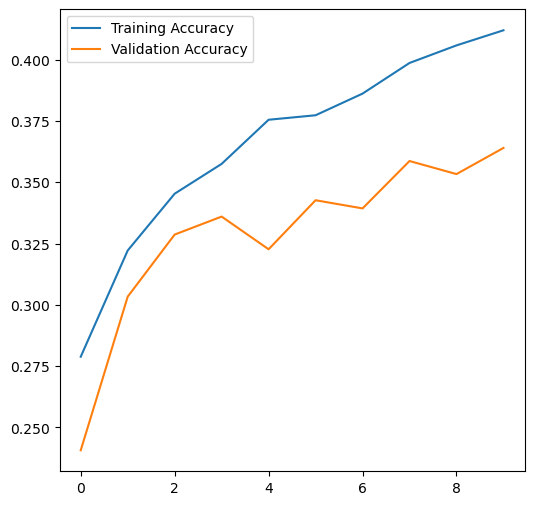

In [164]:
plot_loss_accuracy(hist2)

In [166]:
model2.evaluate(valid_ds_mn)

47/47 [==============================] - 8s 129ms/step - loss: 1.8973 - accuracy: 0.3640


[1.8972554206848145, 0.36399999260902405]